# 4: Regression

The hand-in exercises for this topic is Exercise 1 and 2 from the notebook “Exercises in
linear regression.ipynb”.

---

# Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [26]:
# Only for while working in google colab, can be removed again using jupyter
#from google.colab import files
#uploaded = files.upload()

In [27]:
# Import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
df = pd.read_csv("EnergyEfficiency.csv")

### First look

Using simple methods to get a first look at the data
* Looking at what kind of variables we are working with
* Checking if missing values could cause issues

In [29]:
df.head(10)

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RelativeCompactness      768 non-null    float64
 1   SurfaceArea              768 non-null    float64
 2   WallArea                 768 non-null    float64
 3   RoofArea                 768 non-null    float64
 4   OverallHeight            768 non-null    float64
 5   Orientation              768 non-null    int64  
 6   GlazingArea              768 non-null    float64
 7   GlazingAreaDistribution  768 non-null    int64  
 8   HeatingLoad              768 non-null    float64
 9   CoolingLoad              768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [31]:
df.describe()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

### 1.1: Do a visualization of the relationship/correlation between the variables SurfaceArea and HeatingLoad.

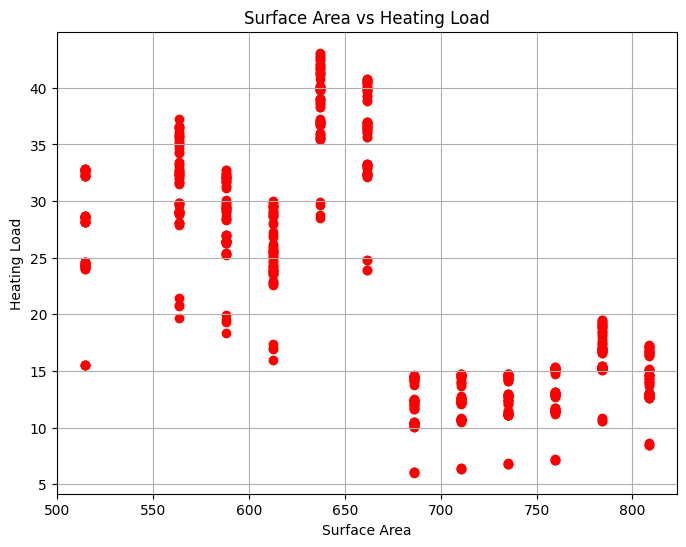

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df['SurfaceArea'], df['HeatingLoad'], color='red')
plt.xlabel("Surface Area")
plt.ylabel("Heating Load")
plt.title("Surface Area vs Heating Load")
plt.grid(True)
plt.show()

There is a correlation bewteen the two variables
* There seem to be tendency of buildings with larger surface areas have a smaller Heating Load

### 1.2: Is there a correlation between SurfaceArea and HeatingLoad? If so, what is the strength of it and is it statistically significant?

To confirm this we can calculate the actualy correlatioon coefficient, if its somewhat close to 1.0, then that further supports this hypothesis

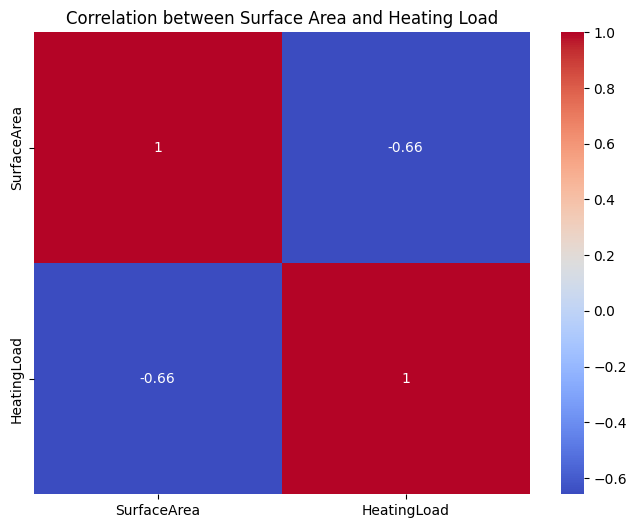

In [33]:
# Seaborn correlation/heatmap for getting an idea of the correlation between the two variables 'surfacearea' and 'heatingload'
plt.figure(figsize=(8, 6))
sns.heatmap(df[['SurfaceArea', 'HeatingLoad']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Surface Area and Heating Load")
plt.show()

1.3: Does the correlation make sense to you? What if you add hue = "OverallHeight" to your scatterplot?



Overall the correlation makes alot of sense
* Larger surface areas means more surface to heat up, this means it less energy effecient to heat up and ultimately require more heating
* Taller buildings have a tendency of the heat flowing up through the structure and trapping the heat. However the bigger the external surfaces get, the more heat is still needed

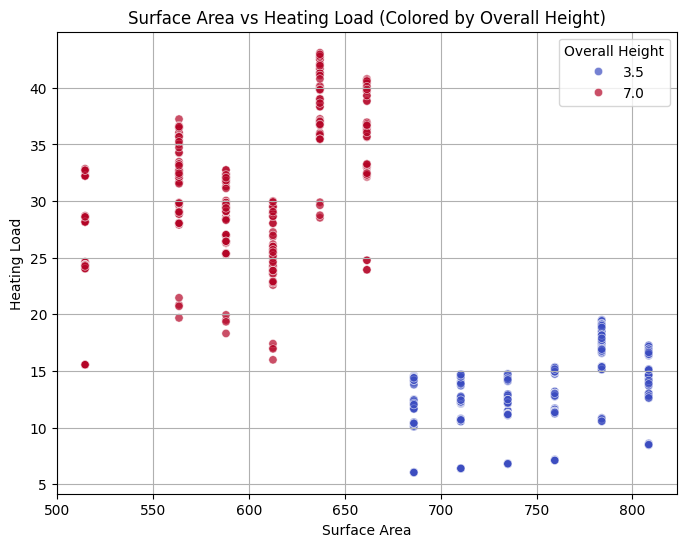

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="SurfaceArea", y="HeatingLoad", hue="OverallHeight", palette="coolwarm", alpha=0.7)
plt.xlabel("Surface Area")
plt.ylabel("Heating Load")
plt.title("Surface Area vs Heating Load (Colored by Overall Height)")
plt.legend(title="Overall Height")
plt.grid(True)
plt.show()

### 1.4: Train a simple linear regression model with SurfaceArea as independent variable (x) and HeatingLoad as dependent variable (y)

Training a linear regression model from the sklearn library
* Doing a train/test split of the data
* Fitting the model

In [35]:
# SurfaceArea as independent variable (x) and HeatingLoad as dependent variable (y)
X = df[['SurfaceArea']]
y = df['HeatingLoad']
# Use test train split, to divide data into train and test sub sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model, choosing LinearRegression from sklearn
model = LinearRegression()
model.fit(X_train, y_train)
# Predicttion variable, will be used later :)
y_pred = model.predict(X_test)

### 1.5: What does the model say about the change HeatingLoad when the SurfaceArea goes up by 1 unit?

To answer this question we will calculate the 'slope' of the regression line. The slope is a term that describes the increase of (y) when (x) increments by exactly 1.

In [36]:
# Get the model coefficient // slope
slope = model.coef_[0] # calc slope using sklearn
print("The slope of the regression line is: " + str(slope))

The slope of the regression line is: -0.07580337285068298


### 1.6: Add the linear regression line to a scatterplot of SurfaceArea and HeatingLoad

This can be done using the y_pred variable from previous steps.
The visualization helps to explain the high MSE, as the dots are not tight at all leaving a large error/distance to the regression line for most of them.

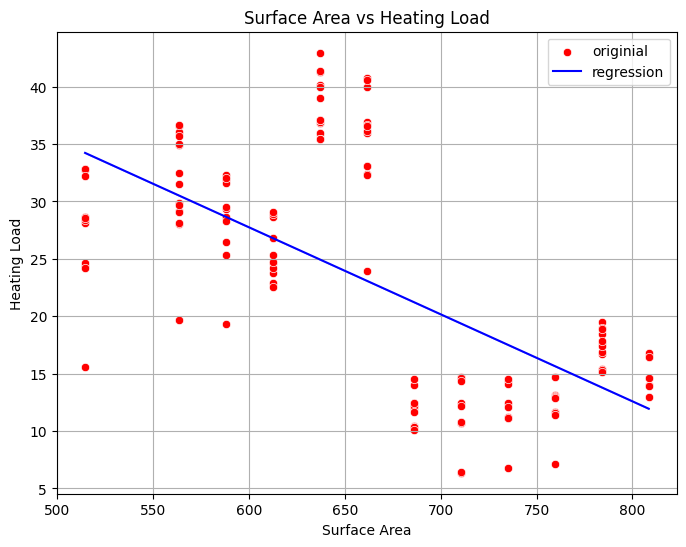

In [37]:
# Draw the regression line in the same style plot as we used earlier
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['SurfaceArea'], y=y_test, color='red', label="originial")
sns.lineplot(x=X_test['SurfaceArea'], y=y_pred, color='blue', label="regression")
plt.xlabel("Surface Area")
plt.ylabel("Heating Load")
plt.title("Surface Area vs Heating Load")
plt.legend()
plt.grid(True)
plt.show()

### 1.7: Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.



Evaluating the model using metrics from sklearn

* Doing model evaluation with metrics MSE and R2
* To have a accurate model we are looking for a low MSE indicating the regression line is close to the actual values
* A R2 score close to 1.0 indicating a accurate model

In [38]:
# Evaluate performance with the classic metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Log the performance metric score results
print("The MSE: " + str(mse))
print("R2 Score: " + str(r2))

The MSE: 62.84823021204858
R2 Score: 0.39703256490466965


Based on these results the model is quite inaccurate for this use case.

---

# Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?

### 2.1: Train a multiple linear regression model for HeatingLoad using at least two other variables from the dataset as feature variables.

To do this we are gonna take a very similar approach as in exercise 1, using surface area vs heatinglevel.
However we are gonna introduce more surface features from the dataset, we are gonna use a combination feature variables 'SurfaceArea', 'RoofArea' and 'OverallHeight'

In [39]:
# Selecting the multiple variables for multiple linear regression
X = df[['SurfaceArea', 'RoofArea', 'OverallHeight']]  # Independent
y = df['HeatingLoad']  # Target

# Same as before, do a test train split so we can perform evaluation afterwards
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 3.2: Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?

Performing evaluations with the same metrics as last time, so we can directly compare the performance of the two models.
Metrics:
* MSE
* R2

In [40]:
# Predictions
y_pred = model.predict(X_test)
# Model performance evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print result metrics
print("The MSE: " + str(mse))
print("R2 Score: " + str(r2))

The MSE: 15.740471592365079
R2 Score: 0.848985536247928


The results are significantly better!
* MSE closer to zero, meaning smaller/fewer errors
* R2 score closer to 1, indicating a better accuracy